## Learning Objectives

We learn a whole lot today! 

1. We learn about parametric models and we get to use one in practice
2. We learn about linear regression and how it fits into the ML picture
3. We learn about using dummy predictors and show how it is a good way to test your model

## Linear Regression

Linear regression is the most used model in practice, and it is our first parametric model, it has parameters which is calls weights and the algorithm associated with Linear regression concerns itself with finding what those weights will be.

In two dimensions Linear regression is easy to explain:

<blockquote>
Find the line of best fit through the X and y points.
</blockquote>

In more than two dimensions it becomes:

<blockquote>
Find the hyperplane of best fit through the X and y points.
</blockquote>

In order to fully understand Linear Regression and any ML algorithm we can go back to the drawing board. Let's return to our assumptions and check to see what a machine learning algorithm entails:

In [ ]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

c0 = 'Unknown target function, f(X) = y + noise'
c1 = 'Inputs, (x_1, y_1), ..., (x_n, y_n)'
c2 = 'Learning Algorithm'
c3 = 'Hypothesis set, H'
c4 = 'Final Hypothesis, g(X) = y'
c5 = 'IID samples from a r.v. X'
c6 = 'Train set'
c7 = 'Test set'
c8 = 'Reported Hypothesis Performance'
c9 = 'Error Measure'

nodes = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]

G = nx.DiGraph()

for n in nodes:
    G.add_node(n)

G.add_edge(c0, c1)
G.add_edge(c3, c2)
G.add_edge(c2, c4)
G.add_edge(c5, c1)
G.add_edge(c1, c6)
G.add_edge(c1, c7)
G.add_edge(c6, c2)
G.add_edge(c7, c8)
G.add_edge(c4, c8)
G.add_edge(c9, c8)
G.add_edge(c9, c2)

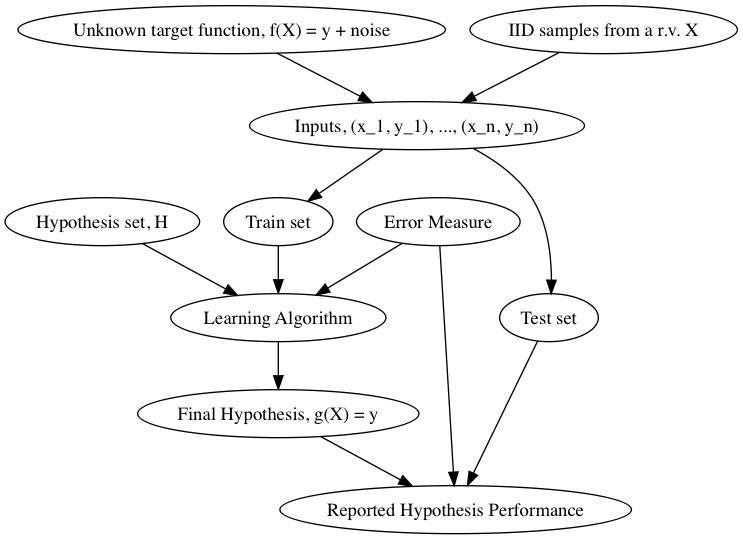

In [14]:
draw(G)

To do that we can refer back to our assumptions. So the machine learning algorithm is composed of five parts of the above diagram:

0. Inputs
1. Hypothesis Set
2. Learning Algorithm
3. Error Measure
3. Final Hypothesis

Notice that we have added error measure from our last description, as we will see that this will become more important in the future.  

#### Inputs and Outputs

Linear regression (and regression tasks in general) are for quantitative outcomes. So we will not be able to predict 

The second concern is about the inputs. Some models need very specific inputs. So for example, or linear regression can only take quantitative features, so we need to make sure to convert all the values to quantitative ones before the regression. The second point that needs to be made is whether the data needs to be standardized. For linear regression the answer is two parts: no, unless there are interaction or quadratic terms (which you can read about [here](http://www.stat.columbia.edu/~gelman/research/published/ape17.pdf).

In summary two points:

1. Linear Regression is a regression model, thus has quantitative outputs
2. Linear regression can only take quantitative features which should be normalized if using interaction or quadratic terms.

#### Hypothesis Set

The hypothesis set is pretty simple for linear regression. We consider all w's such that:

$$ y = w_0 + w_1 * x_1 + ... + w_n * x_n$$

Where y is the target and each $x_i$ is a particular feature. So once again our hypothesis set is infinite. That being said we have a bit more of a handle on the infiniteness of the set. In fact an easy way to tell how infinite our hypothesis set is to count the number of infinite parameters and in linear regression we get n + 1 infinite parameters.

#### Learning Algorithm

There are actually three ways to get to the learning algorithm behind linear regression (a statistical way, a mathematical way, and a functional approximation way). But the important thing to know about it is that it is extremely fast and memory efficient. 

#### Error Measure

The learning algorithm seeks to minimize a specific error measure, and the error measure that it seeks to minimize is mean squared error:

$$ (y - \widehat{y})^2 $$

Where $\widehat{y}$ is our predictions. So simply put we minimize the squared difference between our predictions and the true values. This is partially to defend us against negative error and partially because of the mathematical and statistical derivations. 

One thing to note here is that this is really hard to understand, and typically people use other measures when talking about the performance of linear regression.

#### Final hypothesis

The final hypothesis is simply the set of weights associated with the formula above. So it is easy to store and quick to evaluate.

Let's explore what using linear regression feels like:

In [6]:
from sklearn.datasets import load_boston

boston_data = load_boston()

print boston_data['DESCR']

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [10]:
print boston_data['data'].shape
print boston_data['target'].shape
print boston_data['feature_names']

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
from sklearn.model_selection import train_test_split

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(boston_data['data'], boston_data['target'], test_size=0.2, random_state=1)

# and we make our validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [12]:
print X_train.shape, X_val.shape, X_test.shape

(323, 13) (81, 13) (102, 13)


Let's visualize how using linear regression would work. Let's first look to see which features are the most correlated with the target:

In [41]:
import pandas as pd
import numpy as np

full_data = np.append(X_train, y_train.reshape(-1, 1), axis=-1)

full_df = pd.DataFrame(data=full_data, columns=np.append(boston_data['feature_names'], 'target'))

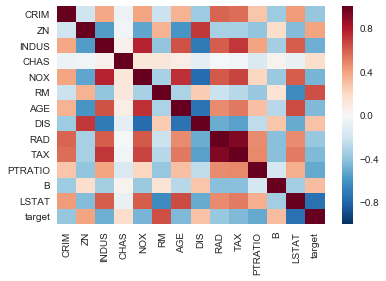

In [47]:
%matplotlib inline
import seaborn as sns

g = sns.heatmap(full_df.corr())
g = g.set_xticklabels(g.get_xticklabels(), rotation=90)

We can see that some of the most correlated columns are: RM and LSTAT

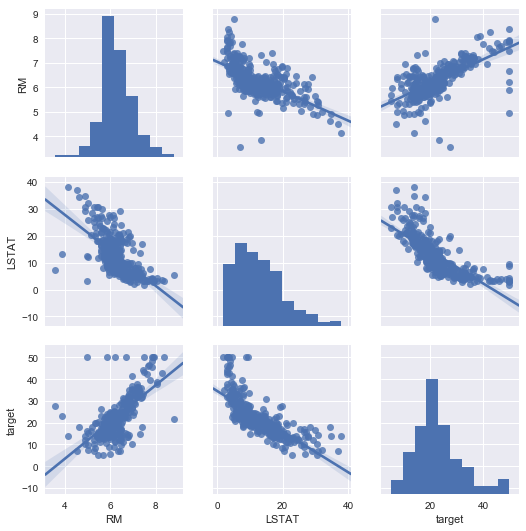

In [49]:
sns.pairplot(full_df[['RM', 'LSTAT', 'target']], kind='reg')

You can see that there are certain trends in the data, newer founded startups tend to be worth more in billions. One of the weaknesses with linear regression however is that it cannot naively capture non-linear interactions. So perhaps two of the features above interact in a specific way, linear regression cannot find this out on its own.

Let's finish by doing the linear regression and then expaining its most common error measure:

In [50]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)

In [51]:
reg.fit(X_train, y_train)

/Users/nate/Desktop/data-science-foundations/env/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# we can see the model here
reg.coef_

array([ -1.19855045e-01,   6.71776446e-02,   5.59423423e-02,
         2.36539068e+00,  -2.34426895e+01,   2.21750933e+00,
         1.60852847e-02,  -1.54171817e+00,   3.14727406e-01,
        -1.00394476e-02,  -1.06202768e+00,   6.13801359e-03,
        -6.14267522e-01])

In [53]:
# first we show the R^2
reg.score(X_val, y_val)

0.72604227109883523

In [54]:
from sklearn.metrics import mean_absolute_error

# second we show the mean absolute error
mean_absolute_error(reg.predict(X_val), y_val)

3.5143161286543516

## How'd we do

We showed to measures: r-squared and MAE:

* Mean Absolute Error: the MAE is how off we are on average. This is generally more business interpretable than MSE
* R squared: this gives you the percent of the variance that the model explains. You would be happy to get a model with over .8 r squared (note the sklearn returns the negative r squared.

So in short, linear regression did not do too well. Perhaps one of the reasons is because of interactions in the data. 

One final trick that we will use is to use a dummy regressor which will apply a very simple strategy and see how well it works in practice. Ours will simply return the mean of the training data:

In [55]:
from sklearn.dummy import DummyRegressor

dummy_preds = DummyRegressor().fit(X_train, y_train).predict(X_val)

mean_absolute_error(dummy_preds, y_val)

6.4569888774223161

Pretty good right, we did 2 times better than the dummy!

## Learning Objectives

We learn a whole lot today! 

1. We learn about parametric models and we get to use one in practice
2. We learn about linear regression and how it fits into the ML picture
3. We learn about using dummy predictors and show how it is a good way to test your model

## Comprehension Questions

1.	Why is linear regression one of the most used algorithms in ML?
2.	Does there need to be a linear relationship between the factors and the targets for linear regression to work?
3.	Can we use qualitative features with linear regression?
4.	Can we use more features in linear regression without increasing the number of infinite parameters?
5.	Can you make a confidence interval of possible regression lines?
6.	Why do Pearson’s correlation and linear regression go so well together?
7.	What does the intercept of linear regression represent? What do the other parameters represent?
9.	Why is using a dummy predictor a good test of our success?
10.	Are there any other dummy predictor strategies that you know?
